In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
#Reflect Tables in to SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
#Measurement Data
inspector = inspect(engine)
measure_columns = inspector.get_columns('measurement')
for c in measure_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#Station Data
station_columns = inspector.get_columns('station')
for c in station_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
#Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [15]:
# Calculate the date 1 year ago from the last data point in the database
#Last Data Point:08.23.17
#Year from that point:08.23.16

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp)

precipitation_last12 = precipitation.filter(Measurement.date >= "2016-08-23").group_by(Measurement.date).all()

precipitation_last12

[('2016-08-23', 0.7),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.01),
 ('2016-08-27', None),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.03),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.44),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.15),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.23),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.33),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.05),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.8

In [17]:
# Save the query results as a Pandas DataFrame 

precip_last12_df = pd.DataFrame(precipitation_last12)
precip_last12_df.head()

,date,prcp
0,2016-08-23,0.70
1,2016-08-24,1.45
2,2016-08-25,0.11
3,2016-08-26,0.01
4,2016-08-27,NaN


In [18]:
#And set the index to the date column
#Sort the dataframe by date

precip_last12_df = precip_last12_df.set_index("date")
precip_last12_df.head()

,prcp
date,
2016-08-23,0.70
2016-08-24,1.45
2016-08-25,0.11
2016-08-26,0.01
2016-08-27,NaN


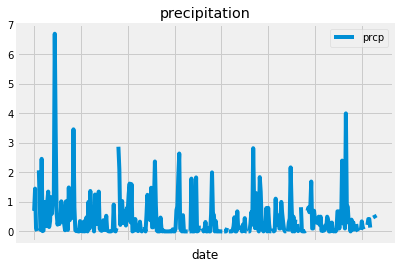

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_last12_df.plot()

plt.title('precipitation')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation = session.query(Measurement.date, Measurement.prcp).all()
precipitation_overall_df = pd.DataFrame(precipitation)
precipitation_statistics = precipitation_overall_df.describe()

precipitation_statistics

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [21]:
# Design a query to show how many stations are available in this dataset?
stations_total_count = session.query(Station.station).count()
stations_total_count

9

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_stations = session.query(Measurement.station, func.count(Measurement.station), Measurement.tobs)
most_active_stations_filtered = most_active_stations.group_by(Measurement.station)
most_active_stations_filtered_descending = most_active_stations_filtered.order_by(func.count(Measurement.station).desc()).all()
most_active_stations_filtered_descending

[('USC00519281', 2772, 79.0),
 ('USC00519397', 2724, 81.0),
 ('USC00513117', 2709, 77.0),
 ('USC00519523', 2669, 82.0),
 ('USC00516128', 2612, 76.0),
 ('USC00514830', 2202, 82.0),
 ('USC00511918', 1979, 64.0),
 ('USC00517948', 1372, 81.0),
 ('USC00518838', 511, 70.0)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

stations_data = session.query(Measurement.station, Measurement.tobs).all()

stations_data_df = pd.DataFrame(stations_data)

most_active_station = stations_data_df.loc[stations_data_df["station"] == "USC00519281"]

#most_active_station.head()

maxT_most_act = most_active_station["tobs"].max()
minT_most_act = most_active_station["tobs"].min()
avgT_most_act = most_active_station["tobs"].mean()

print(f"[({minT_most_act}, {maxT_most_act}, {avgT_most_act})]")


[(54.0, 85.0, 71.66378066378067)]


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
#sel = [Measurement.station,
   # func.min(Measurement.tobs),
     # func.max(Measurement.tobs),
     # func.avg(Measurement.tobs)]
#most_active_stats = session.query(*sel).filter(Measurement.id =='USC00519281').all()
#most_active_stats

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#USC00519281

highest_tobs_12 = session.query(Measurement.tobs).filter(Measurement.date >= "2016-08-23", \
                                                         Measurement.station == "USC00519281").all()
highest_tobs_12


[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [26]:
#Tobs Data into DataFrame
highest_tobs_df = pd.DataFrame(highest_tobs_12)
highest_tobs_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


<function matplotlib.pyplot.show(*args, **kw)>

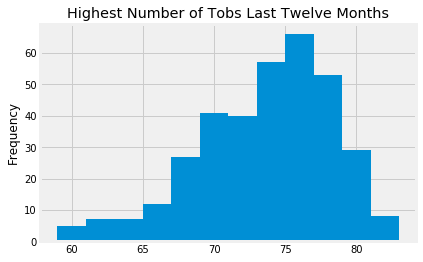

In [27]:
#Tobs Histogram

plt.hist(highest_tobs_df["tobs"], bins=12)
plt.title("Highest Number of Tobs Last Twelve Months")
plt.ylabel("Frequency")
plt.show

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]
